# Task 1 : Data Exploration and Preprocessing

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Dataset .csv")


In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.shape

(9551, 21)

There are 9551 rows and 21 columns

In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [215]:
null_columns = df.columns[df.isnull().any()]# null columns checking
print("Columns with null values:", null_columns)

Columns with null values: Index([], dtype='object')


#### No null values

In [12]:
# Changing country code into string data type.
df['Country Code']=df['Country Code'].astype(str)
print(df['Country Code'].dtype)

object


In [26]:
df['Aggregate rating'].describe()

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [50]:
aggre_count=df['Aggregate rating'].value_counts().sort_index()
print(aggre_count)

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


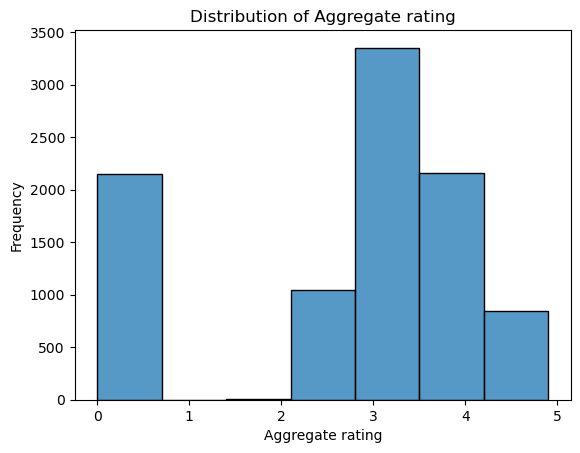

In [44]:
sns.histplot(df['Aggregate rating'],bins=7)
plt.title('Distribution of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.show()

#### Here zero rating shows an imbalance from overall data

In [174]:
aggre_data=pd.DataFrame({
    'Aggregate rating': aggre_count.index,
    'count': aggre_count.values,
})

In [176]:
print(aggre_data.head())  # Displays the first few rows
print(aggre_data.shape)   # Outputs the shape of the DataFrame


  Aggregate rating count
0              0.0  2148
1              1.8     1
2              1.9     2
3              2.0     7
4              2.1    15
(34, 2)


In [178]:
aggre_data

,Aggregate rating,count
0,0.0,2148
1,1.8,1
2,1.9,2
3,2.0,7
4,2.1,15
5,2.2,27
6,2.3,47
7,2.4,87
8,2.5,110
9,2.6,191


In [192]:
print(len(aggre_data.index))  # Number of unique ratings
print(len(aggre_data.values))

34
34


In [190]:
total = aggre_data["count"].cumsum()  # This produces an array, not a scalar
total = aggre_data["count"].sum() 
print(total)

[9573.48979164 9551.01047011 9551.02094022 9551.07329075 9551.15705162
 9551.28269291 9551.49209507 9551.91089938 9552.15171186 9552.9997906
 9553.61752696 9554.29808397 9554.98911109 9555.90001047 9556.43398597
 9556.46539629 9556.05706209 9556.21411371 9556.02565176 9555.79530939
 9555.47073605 9555.18804314 9554.50748613 9553.78504869 9553.86880955
 9553.31389383 9552.82179876 9552.50769553 9551.99466024 9551.81666841
 9551.43974453 9551.2617527  9551.63867658]


In [194]:
#we need total as a single value
agre_data["count"] = pd.to_numeric(agre_data["count"], errors="coerce")# ensure the 'Count' data contains only numerical value.
total = agre_data["count"].sum()
print(total)

9551.0


In [200]:
# Calculate the Proportion (%)
agre_data["Proportion (%)"] = (agre_data["count"] / total) * 100

# Print the updated DataFrame
print(agre_data)

   Aggregate rating   count  Proportion (%)
0               0.0  2148.0       22.489792
1               1.8     1.0        0.010470
2               1.9     2.0        0.020940
3               2.0     7.0        0.073291
4               2.1    15.0        0.157052
5               2.2    27.0        0.282693
6               2.3    47.0        0.492095
7               2.4    87.0        0.910899
8               2.5   110.0        1.151712
9               2.6   191.0        1.999791
10              2.7   250.0        2.617527
11              2.8   315.0        3.298084
12              2.9   381.0        3.989111
13              3.0   468.0        4.900010
14              3.1   519.0        5.433986
15              3.2   522.0        5.465396
16              3.3   483.0        5.057062
17              3.4   498.0        5.214114
18              3.5   480.0        5.025652
19              3.6   458.0        4.795309
20              3.7   427.0        4.470736
21              3.8   400.0     

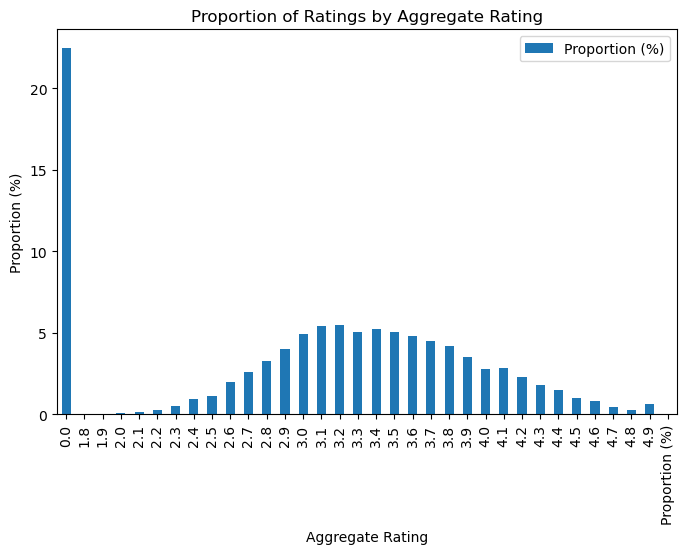

In [213]:
import matplotlib.pyplot as plt
agre_data.plot(kind="bar", x="Aggregate rating", y="Proportion (%)", figsize=(8, 5))
plt.title("Proportion of Ratings by Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Proportion (%)")
plt.show()

In [205]:
threshold = 5  # Example threshold
overrepresented_ratings = agre_data[agre_data["Proportion (%)"] > threshold]
print("Overrepresented Ratings:")
print(overrepresented_ratings)

Overrepresented Ratings:
   Aggregate rating   count  Proportion (%)
0               0.0  2148.0       22.489792
14              3.1   519.0        5.433986
15              3.2   522.0        5.465396
16              3.3   483.0        5.057062
17              3.4   498.0        5.214114
18              3.5   480.0        5.025652


### Observations:
Most Overrepresented Rating:

The rating 0.0 Aggregate rating for 22.49% of the total ratings, significantly higher than any other rating. This indicates a strong concentration at the lowest rating level, which creates an imbalance.